# Import libraries 

In [7]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

# conda install -c conda-forge mlxtend

In [3]:
titanic = pd.read_csv("Titanic.csv")
titanic.head()

,Class,Gender,Age,Survived
0,3rd,Male,Child,No
1,3rd,Male,Child,No
2,3rd,Male,Child,No
3,3rd,Male,Child,No
4,3rd,Male,Child,No


# Data Visualisation

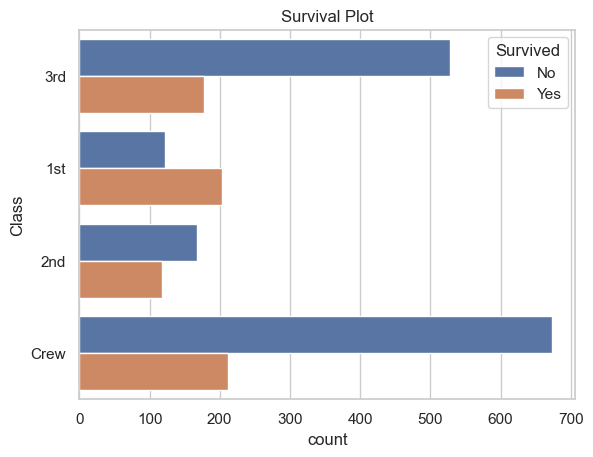

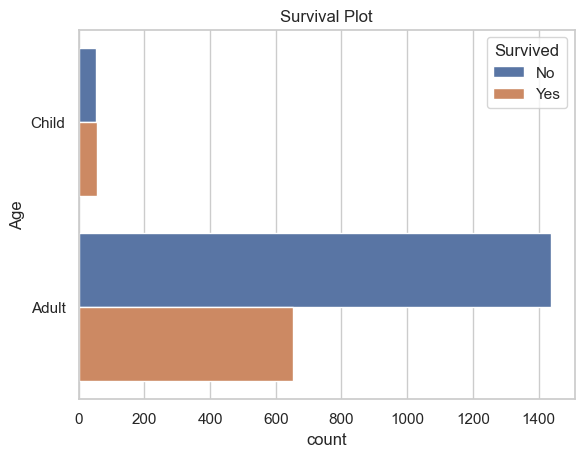

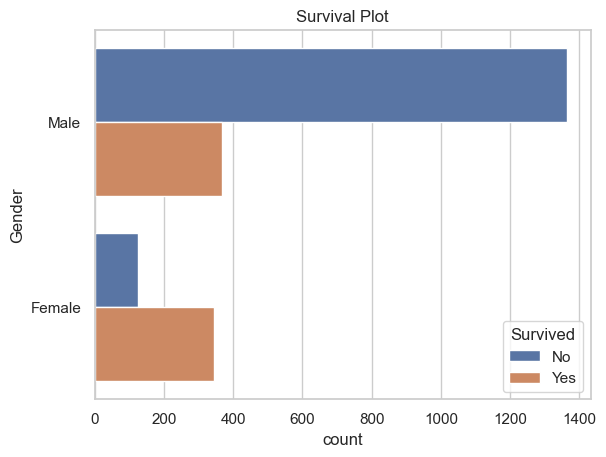

In [8]:
for x in ['Class','Age', 'Gender']:
    sn.set(style="whitegrid")
    ax = sn.countplot(y=x, hue="Survived", data=titanic)
    plt.ylabel(x)
    plt.title('Survival Plot')
    plt.show()

# Pre-Processing
As the data is not in transaction formation 
We are using transaction Encoder

In [3]:
df=pd.get_dummies(titanic)
df.head()

,Class_1st,Class_2nd,Class_3rd,Class_Crew,Gender_Female,Gender_Male,Age_Adult,Age_Child,Survived_No,Survived_Yes
0,0,0,1,0,0,1,0,1,1,0
1,0,0,1,0,0,1,0,1,1,0
2,0,0,1,0,0,1,0,1,1,0
3,0,0,1,0,0,1,0,1,1,0
4,0,0,1,0,0,1,0,1,1,0


# Apriori Algorithm 

In [4]:
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)
frequent_itemsets

C:\Users\DELL\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.786461,(Gender_Male)
1,0.950477,(Age_Adult)
2,0.676965,(Survived_No)
3,0.757383,"(Age_Adult, Gender_Male)"
4,0.619718,"(Survived_No, Gender_Male)"
5,0.653339,"(Survived_No, Age_Adult)"
6,0.603816,"(Survived_No, Age_Adult, Gender_Male)"


In [7]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Age_Adult),(Gender_Male),0.950477,0.786461,0.757383,0.796845,1.013204,0.009870,1.051116
1,(Gender_Male),(Age_Adult),0.786461,0.950477,0.757383,0.963027,1.013204,0.009870,1.339441
2,(Survived_No),(Gender_Male),0.676965,0.786461,0.619718,0.915436,1.163995,0.087312,2.525187
3,(Gender_Male),(Survived_No),0.786461,0.676965,0.619718,0.787984,1.163995,0.087312,1.523634
4,(Survived_No),(Age_Adult),0.676965,0.950477,0.653339,0.965101,1.015386,0.009900,1.419023
5,(Age_Adult),(Survived_No),0.950477,0.676965,0.653339,0.687380,1.015386,0.009900,1.033317
6,"(Survived_No, Age_Adult)",(Gender_Male),0.653339,0.786461,0.603816,0.924200,1.175139,0.089991,2.817152
7,"(Survived_No, Gender_Male)",(Age_Adult),0.619718,0.950477,0.603816,0.974340,1.025106,0.014788,1.929980
8,"(Age_Adult, Gender_Male)",(Survived_No),0.757383,0.676965,0.603816,0.797241,1.177669,0.091095,1.593193
9,(Survived_No),"(Age_Adult, Gender_Male)",0.676965,0.757383,0.603816,0.891946,1.177669,0.091095,2.245337


#####  An leverage value of 0 indicates independence. Range will be [-1 1]
A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

In [8]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,"(Age_Adult, Gender_Male)",(Survived_No),0.757383,0.676965,0.603816,0.797241,1.177669,0.091095,1.593193
9,(Survived_No),"(Age_Adult, Gender_Male)",0.676965,0.757383,0.603816,0.891946,1.177669,0.091095,2.245337
6,"(Survived_No, Age_Adult)",(Gender_Male),0.653339,0.786461,0.603816,0.924200,1.175139,0.089991,2.817152
11,(Gender_Male),"(Survived_No, Age_Adult)",0.786461,0.653339,0.603816,0.767764,1.175139,0.089991,1.492710
2,(Survived_No),(Gender_Male),0.676965,0.786461,0.619718,0.915436,1.163995,0.087312,2.525187
3,(Gender_Male),(Survived_No),0.786461,0.676965,0.619718,0.787984,1.163995,0.087312,1.523634
7,"(Survived_No, Gender_Male)",(Age_Adult),0.619718,0.950477,0.603816,0.974340,1.025106,0.014788,1.929980
10,(Age_Adult),"(Survived_No, Gender_Male)",0.950477,0.619718,0.603816,0.635277,1.025106,0.014788,1.042660
4,(Survived_No),(Age_Adult),0.676965,0.950477,0.653339,0.965101,1.015386,0.009900,1.419023
5,(Age_Adult),(Survived_No),0.950477,0.676965,0.653339,0.687380,1.015386,0.009900,1.033317


In [9]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Age_Adult),(Gender_Male),0.950477,0.786461,0.757383,0.796845,1.013204,0.009870,1.051116
1,(Gender_Male),(Age_Adult),0.786461,0.950477,0.757383,0.963027,1.013204,0.009870,1.339441
2,(Survived_No),(Gender_Male),0.676965,0.786461,0.619718,0.915436,1.163995,0.087312,2.525187
3,(Gender_Male),(Survived_No),0.786461,0.676965,0.619718,0.787984,1.163995,0.087312,1.523634
4,(Survived_No),(Age_Adult),0.676965,0.950477,0.653339,0.965101,1.015386,0.009900,1.419023
5,(Age_Adult),(Survived_No),0.950477,0.676965,0.653339,0.687380,1.015386,0.009900,1.033317
6,"(Survived_No, Age_Adult)",(Gender_Male),0.653339,0.786461,0.603816,0.924200,1.175139,0.089991,2.817152
7,"(Survived_No, Gender_Male)",(Age_Adult),0.619718,0.950477,0.603816,0.974340,1.025106,0.014788,1.929980
8,"(Age_Adult, Gender_Male)",(Survived_No),0.757383,0.676965,0.603816,0.797241,1.177669,0.091095,1.593193
9,(Survived_No),"(Age_Adult, Gender_Male)",0.676965,0.757383,0.603816,0.891946,1.177669,0.091095,2.245337
